In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00005.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00057.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00020.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00072.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00040.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00043.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00010.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00071.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/image

In [2]:
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import keras
from keras.models import Sequential

In [4]:
audio_data = '../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00026.wav'
data , sr = librosa.load(audio_data)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [5]:
librosa.load(audio_data, sr=45600)

(array([-0.0792949 , -0.10390088, -0.09562172, ..., -0.06867502,
        -0.0554162 , -0.027182  ], dtype=float32),
 45600)

Playing audio

In [6]:
import IPython
IPython.display.Audio(data,rate=sr)

## Visualization

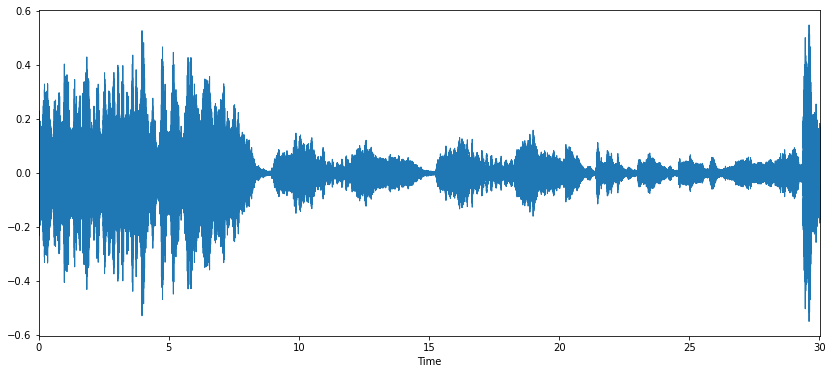

In [7]:
plt.figure(figsize=(14,6))
librosa.display.waveplot(data)
plt.show()

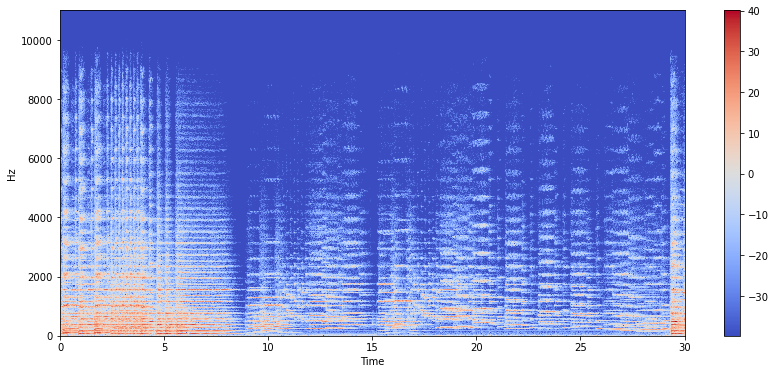

In [8]:
X = librosa.stft(data)
amp = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,6))
librosa.display.specshow(amp,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

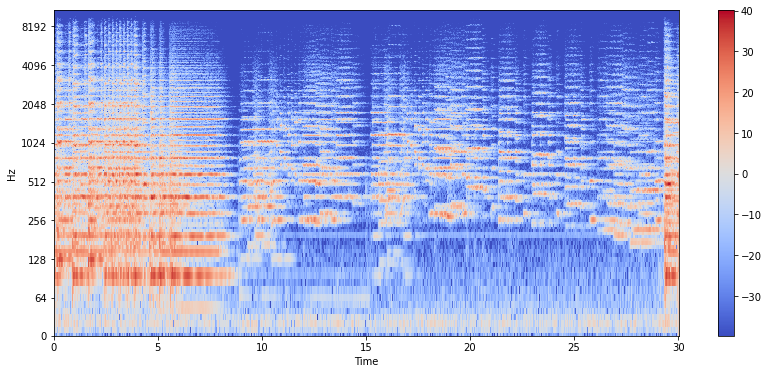

In [9]:
plt.figure(figsize=(14, 6))
librosa.display.specshow(amp, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

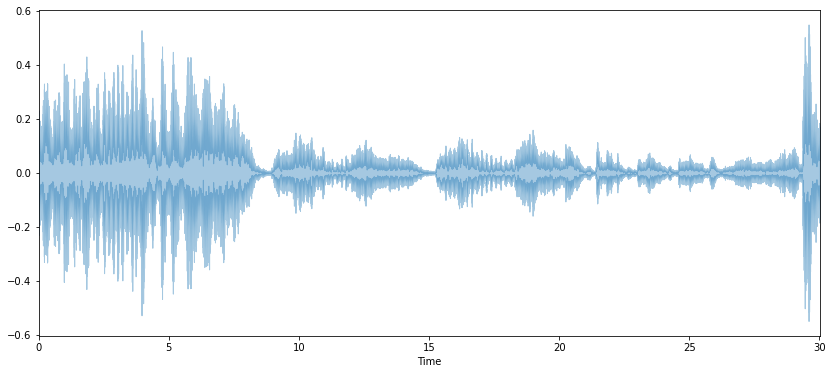

In [10]:
from sklearn.preprocessing import normalize

spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(14, 6))
librosa.display.waveplot(data, sr=sr, alpha=0.4)

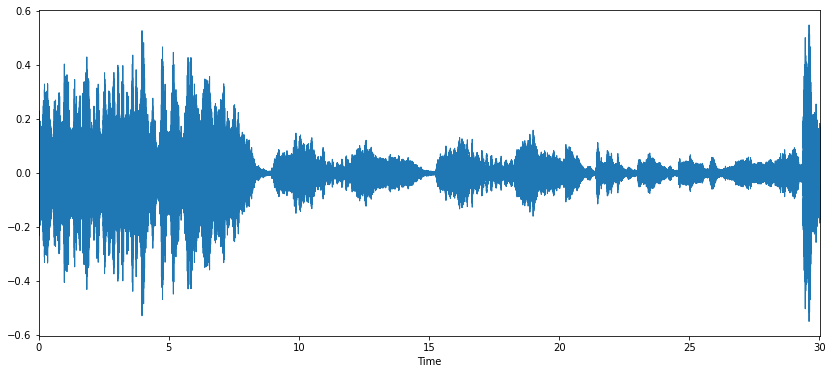

In [11]:
plt.figure(figsize=(14, 6))
librosa.display.waveplot(data, sr=sr)

### Zero crossing

The number of zero-crossings is : 1


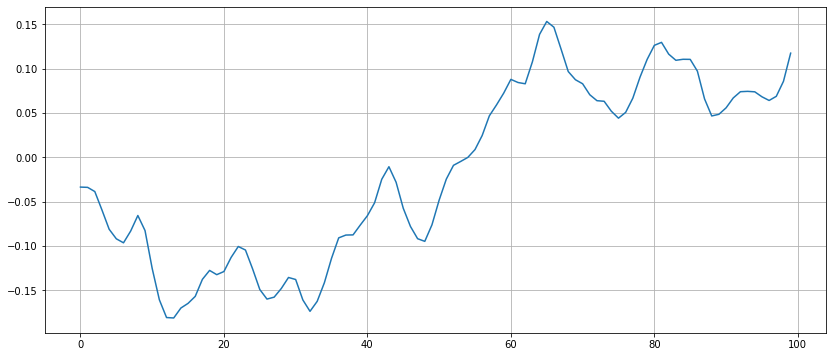

In [12]:
n_0 = 9000
n_1 = 9100

zc = librosa.zero_crossings(data[n_0:n_1], pad=False)
print("The number of zero-crossings is :",sum(zc))

plt.figure(figsize=(14,6))
plt.plot(data[n_0:n_1])
plt.grid()

### Classification

In [13]:
df1 = pd.read_csv('../input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv')
df1.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [14]:
print(df1.shape)
print(df1.dtypes)

(9990, 60)
filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var

In [15]:
df1 = df1.drop(labels='filename',axis=1)

In [16]:
genre_list = df1.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

[0 0 0 ... 9 9 9]


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(np.array(df1.iloc[:, :-1], dtype = float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Neural networks

In [18]:
m = Sequential()
m.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
m.add(layers.Dense(128, activation='relu'))
m.add(layers.Dense(64, activation='relu'))
m.add(layers.Dense(10, activation='softmax'))
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
classifier = m.fit(X_train,y_train,epochs=100,batch_size=128)

Epoch 1/100
59/59 [==============================] - 0s 3ms/step - loss: 1.4508 - accuracy: 0.5019
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 0.8648 - accuracy: 0.7058
Epoch 3/100
59/59 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.7691
Epoch 4/100
59/59 [==============================] - 0s 3ms/step - loss: 0.5570 - accuracy: 0.8165
Epoch 5/100
59/59 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.8398
Epoch 6/100
59/59 [==============================] - 0s 3ms/step - loss: 0.3948 - accuracy: 0.8708
Epoch 7/100
59/59 [==============================] - 0s 3ms/step - loss: 0.3326 - accuracy: 0.8970
Epoch 8/100
59/59 [==============================] - 0s 3ms/step - loss: 0.2880 - accuracy: 0.9118
Epoch 9/100
59/59 [==============================] - 0s 3ms/step - loss: 0.2411 - accuracy: 0.9290
Epoch 10/100
59/59 [==============================] - 0s 3ms/step - loss: 0.1986 - accuracy: 0.9446
Epoch 11/

### Accuracy

In [20]:
loss, acc  = m.evaluate(X_test, y_test, batch_size=128)
print('Loss = ',loss,'Accuracy = ',acc)


20/20 [==============================] - 0s 1ms/step - loss: 0.5392 - accuracy: 0.8887
Loss =  0.5392091870307922 Accuracy =  0.8887109756469727


### Using validation set

In [21]:
history = m.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32)

Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 0.2842 - accuracy: 0.9195 - val_loss: 0.4700 - val_accuracy: 0.8679
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9764 - val_loss: 0.5276 - val_accuracy: 0.8719
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9939 - val_loss: 0.4935 - val_accuracy: 0.8907
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 0.9971 - val_loss: 0.5164 - val_accuracy: 0.8887
Epoch 5/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0103 - accuracy: 0.9977 - val_loss: 0.5381 - val_accuracy: 0.8871
Epoch 6/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9859 - val_loss: 0.6457 - val_accuracy: 0.8583
Epoch 7/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0619 - accuracy: 0.9798 - val_loss: 0.5641 - val_accuracy: 0.8751
Epoch 

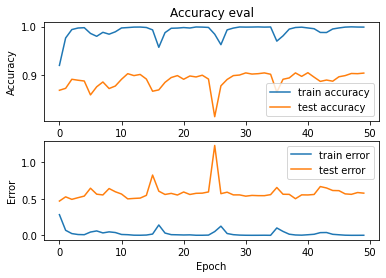

In [22]:
fig,axs = plt.subplots(2)
axs[0].plot(history.history["accuracy"],label="train accuracy")
axs[0].plot(history.history["val_accuracy"],label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc='lower right')
axs[0].set_title("Accuracy eval")
    
axs[1].plot(history.history["loss"],label="train error")
axs[1].plot(history.history["val_loss"],label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc='upper right')
plt.show()

## CNN